# Image Classifier
</br >
<center>
<img src="https://miro.medium.com/max/3840/1*oB3S5yHHhvougJkPXuc8og.gif" width="800" />
</center>

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

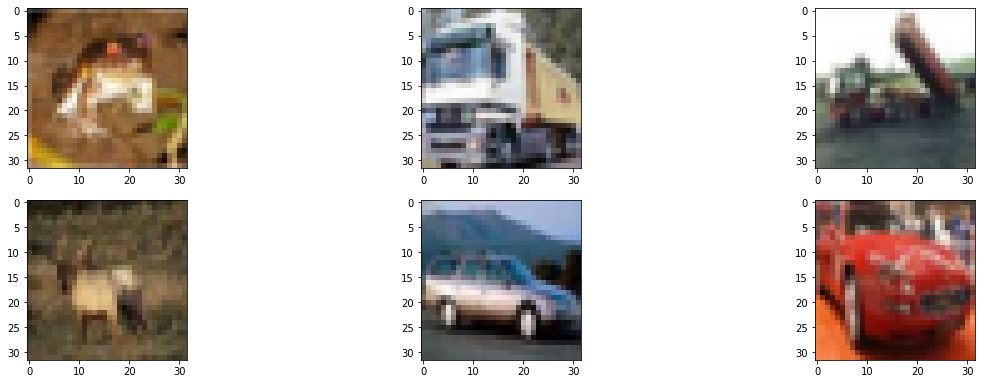

In [3]:
#plotting data from the dataset
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
plt.show()

In [4]:
#Converting the pixel values to float
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [5]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [6]:
# Creating a sequential model with the different layers that we have imported
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
# Configure the optimizer and compile the model
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [9]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=20,batch_size=32)

Epoch 1/20
1563/1563 [==============================] - 169s 108ms/step - loss: 1.8982 - accuracy: 0.3027 - val_loss: 1.4589 - val_accuracy: 0.4831
Epoch 2/20
1563/1563 [==============================] - 170s 109ms/step - loss: 1.4104 - accuracy: 0.4881 - val_loss: 1.2592 - val_accuracy: 0.5490
Epoch 3/20
1563/1563 [==============================] - 159s 102ms/step - loss: 1.2418 - accuracy: 0.5522 - val_loss: 1.1673 - val_accuracy: 0.5810
Epoch 4/20
1563/1563 [==============================] - 174s 111ms/step - loss: 1.1153 - accuracy: 0.5997 - val_loss: 1.0560 - val_accuracy: 0.6260
Epoch 5/20
1563/1563 [==============================] - 174s 111ms/step - loss: 1.0027 - accuracy: 0.6467 - val_loss: 1.0202 - val_accuracy: 0.6391
Epoch 6/20
1563/1563 [==============================] - 179s 115ms/step - loss: 0.9120 - accuracy: 0.6763 - val_loss: 0.9945 - val_accuracy: 0.6508
Epoch 7/20
1563/1563 [==============================] - 176s 113ms/step - loss: 0.8300 - accuracy: 0.7071 - val_

<center>
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/10/dl_meme2.jpg" width="400" />
</center>

In [10]:
# checking the accuracy of the model
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 3s 8ms/step - loss: 1.0288 - accuracy: 0.6960
69.59999799728394


# Got accuracy of almost 70%!!!
<center>
<img src="https://media1.tenor.com/images/c6320c7fba5e3957fdc9cee3390fad46/tenor.gif?itemid=14452632" width="400" />
</center>

In [11]:
model.save("model1_cifar_10epoch.h5")

In [12]:
# Create a dictionary to map to the output classes and make predictions from the model
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("z:/test_data/test0")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

FileNotFoundError: [Errno 2] No such file or directory: 'z:/test_data/test0'

## Now lets create a GUI 

In [13]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

#load the trained model to classify the images

from keras.models import load_model
model = load_model('model1_cifar_10epoch.h5')

#dictionary to label all the CIFAR-10 dataset classes.

classes = { 
    0:'aeroplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck' 
}
#initialise GUI

top=tk.Tk()
top.geometry('800x600')
top.title('Image Classification CIFAR10')
top.configure(background='gray90')
label=Label(top,background='gray90', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#101538', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#484f5c', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,
  padx=10,pady=5)

upload.configure(background='#484f5c', foreground='white',
    font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Image Classification",pady=20, font=('arial',20,'bold'))

heading.configure(background='gray90',foreground='#484f5c')
heading.pack()
top.mainloop()

C:\Users\anish\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


dog
deer
automobile
bird
aeroplane
truck
aeroplane
horse
truck
aeroplane
